## Customer Segmentation and Clustering Analysis
by Wadud Khan

Customer Segmentation is the practice of dividing a company's customers into groups such that customers with similar characteristics are grouped together, allowing targeted action to be taken to derive value from them. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

In this project we will perform a data analysis of a dataset of mall customers. We will also be using K-means Clustering, an unsupervised machine learning algorithm to segment the customers to find possible groups of interest. Our goal here is to answer: what common characteristics can we find in our customers that can provide value to us?

In [3]:
#Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.info()   #metadata
df.head(10)  #First 10 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


The data consists of 5 variables and 200 observations. Now that we have imported our dependencies and loaded in our data, we can move on to our approach.

### <u>The Approach</u>

- We will do some Exploratory Data Analysis to understand our data better.

- We will deploy K-Means Clustering to create our customer segments.

- We will further analyze the individual clusters created.

### <u> Exploratory Data Analysis </u>

Let's visualize the distribution of all numerical variables of interest

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

<Figure size 216x216 with 0 Axes>

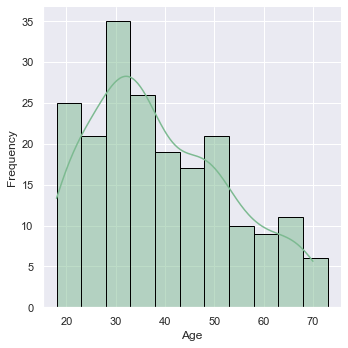

<Figure size 216x216 with 0 Axes>

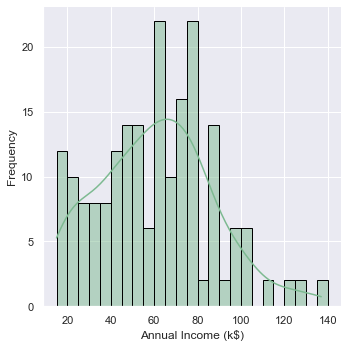

<Figure size 216x216 with 0 Axes>

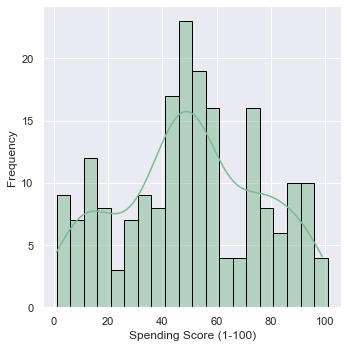

In [6]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns:
    plt.figure(figsize = (3,3))
    sns.set(style="darkgrid", palette= 'crest', font_scale = 1.0)
    sns.displot(df[i], edgecolor = 'black', binwidth = 5,kde =True).set(ylabel = 'Frequency') 
    plt.show()

- Most of the Customers are between the ages of 20-55, with 30-35 year olds shopping the most.

- An income of 60k to 80k is very common among shoppers.

- Spending Score and Annual Income follow a near normal distribution.



If a marketing team would like to plan an ad campaign geared specifically towards Male or Female customers, it would be wise to look at the distribution of age and income of their target audience. This will allow the team to strategize appropriately. We can create Kernal Density Plots broken down by gender. 

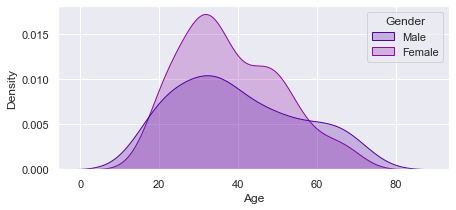

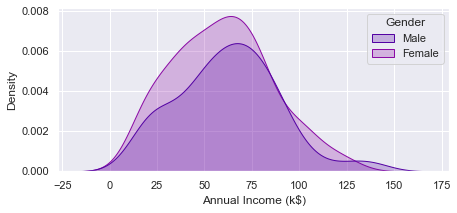

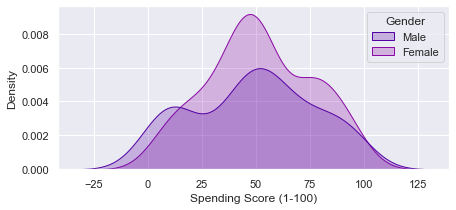

In [5]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns:
    plt.figure(figsize = (7,3))
    sns.set(style="darkgrid", palette= 'plasma' , font_scale=1.0)
    sns.kdeplot(df[i], shade=True, hue = df['Gender']).set(ylabel = 'Density')
    plt.show()

- According to this dataset,  there are more female customers than male customers at the age range of 18-58. Looking outside of this range however, we see more male customers specifically below 18 years and above 58.


- Distribution of Income between genders are generally similar. When looking between 90k and 125k, females are more common than males. at 125k to 150k we see males exceed females. Interestingly, there is slight bimodal behavior occuring here. This indicates this specific group of males are outliers.

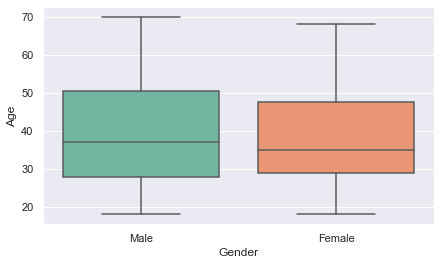

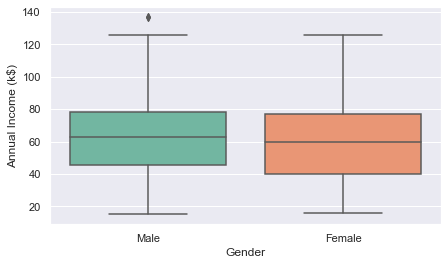

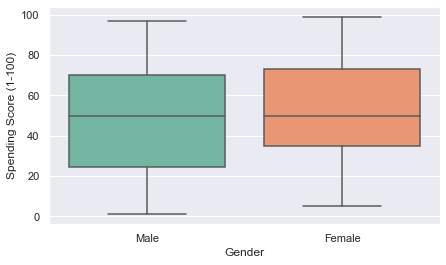

In [6]:
columns = ['Age','Annual Income (k$)','Spending Score (1-100)']

for i in columns:
    plt.figure(figsize=(7,4))
    sns.set(style="darkgrid", palette= 'Set2' , font_scale=1.0)
    sns.boxplot(data=df,x = "Gender", y = df[i])
    plt.show()

In [7]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

 It's important to consider that this data set accounts for more females than males, with 112 of the observations for females and 88 for males. 

 Let's look at correllation between variables

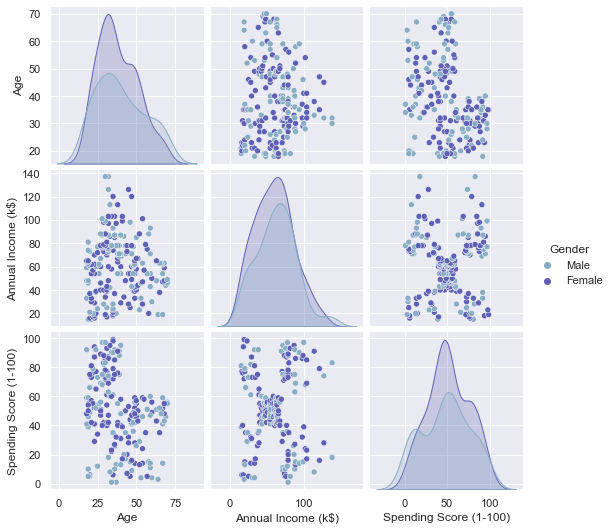

In [8]:

df2 = df.drop('CustomerID', axis = 1)
sns.set(style="darkgrid", palette= 'twilight' , font_scale=1.0)
sns.pairplot(df2, hue = 'Gender')


In [9]:
df2.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


### <u>Clustering Analysis with K-Means Clustering</u>

In [10]:
Clustering1 = KMeans()  #Calling the Kmeans Algorithm from SciKitLearn

Clustering1.fit(df[['Annual Income (k$)']]) #Fitting the Annual Income Feature on our model

Clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4,
       4, 4], dtype=int32)

We cannot directly interpret this, however we can already see our clusters have been made and there are about 8 of them (0-7 is 8 digits). This means from the feature we used, there are 8 groups. We can append this to our dataframe.

In [11]:
df['Income Cluster'] = Clustering1.labels_
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
5,6,Female,22,17,76,3
6,7,Female,35,18,6,3
7,8,Female,23,18,94,3
8,9,Male,64,19,3,3
9,10,Female,30,19,72,3


We can see how many of our customers fall in each cluster

In [12]:
df['Income Cluster'].value_counts()

6    40
0    36
3    30
7    30
1    26
2    18
5    14
4     6
Name: Income Cluster, dtype: int64

Cluster 1 is the most common, followed by Cluster 4, then Cluster 0. Cluster 2 is the least common.

However this is not very useful. First, since we can specify the K in our model to our choosing, How do we know what K to choose? a common method is the elbow method. 

In [13]:
Clustering1.inertia_

2841.1487179487185

In [14]:
inertia_scores = []

for i in range (1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [15]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3931.988095238095,
 2827.308424908425,
 2189.256371406371,
 1784.4503956827486]

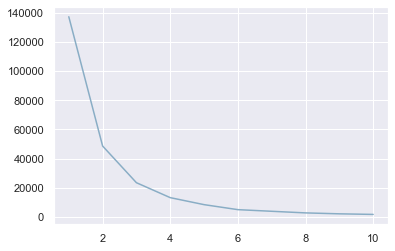

In [16]:
elbowplot = plt.plot(range(1,11),inertia_scores)
elbowplot

When using the elbow method, we look at where the 'bend' of the 'elbow' occurs. We can use this as our value of K in our K means clustering algorithm. From the looks of it, 3 is a good value for K. So let's go back and specify a value of 3 clusters.

In [17]:
Clustering1 = KMeans(n_clusters= 3)  #Specifying K = 3 
Clustering1.fit(df[['Annual Income (k$)']]) #Fitting the Annual Income Feature on our model

Clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

Once again, add a column of the new cluster labels.

In [18]:
df['Income Cluster'] = Clustering1.labels_
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


In [19]:
df['Income Cluster'].value_counts()

2    90
0    74
1    36
Name: Income Cluster, dtype: int64

- 90 records in cluster 2, followed by 74 in cluster 1, and finally 36 in cluster 0.

We can look at summary statistics within each cluster

In [20]:
df.groupby('Income Cluster')['Age','Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.500000,33.486486,50.229730
1,37.833333,99.888889,50.638889
2,38.722222,67.088889,50.000000


#### Bivariate Clustering 

In [21]:
clustering2 = KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,2
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,2
4,5,Female,31,17,40,0,4
5,6,Female,22,17,76,0,2
6,7,Female,35,18,6,0,4
7,8,Female,23,18,94,0,2
8,9,Male,64,19,3,0,4
9,10,Female,30,19,72,0,2


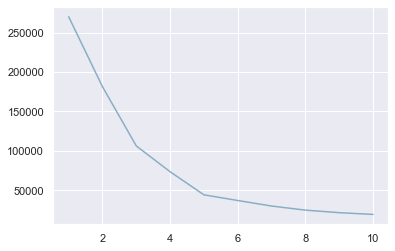

In [22]:
inertia_scores2 = []

for i in range (1,11):
    kmeans2 = KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores2)
plt.show()

When using these two features, the elbow method calls for K to be set equal to 5

First let's look at a basic scatterplot between Annual Income and Spending Score

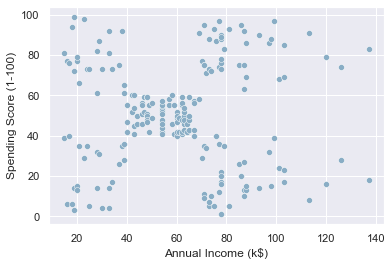

In [23]:
sns.scatterplot(data = df,x = 'Annual Income (k$)',y = 'Spending Score (1-100)')
plt.show()

From using our eyes and intuition alone, we can argue 5 is a fair guess of the number of clusters. Confirmed by the elbow method earlier! Let's visualize the clusters using the hue arguement in our plot.

In [24]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_

df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,1
5,6,Female,22,17,76,0,3
6,7,Female,35,18,6,0,1
7,8,Female,23,18,94,0,3
8,9,Male,64,19,3,0,1
9,10,Female,30,19,72,0,3


Text(0.5, 1.0, 'K-means Clustering with K=5')

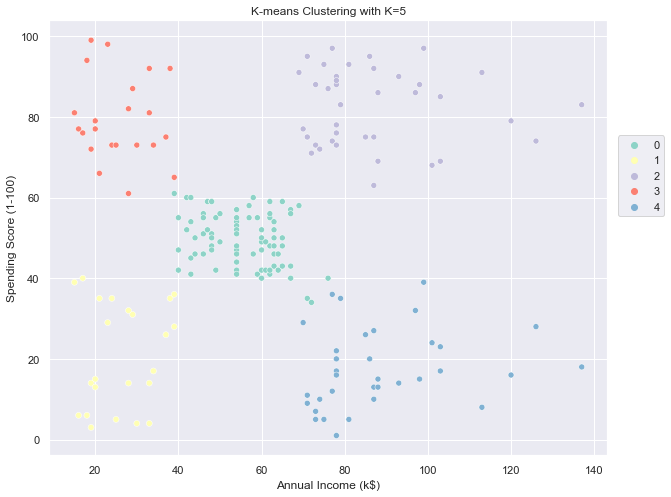

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df,x = 'Annual Income (k$)',y = 'Spending Score (1-100)', hue='Spending and Income Cluster',palette='Set3')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='lower left', borderaxespad=0)
plt.title("K-means Clustering with K=5")